In [2]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
import os

In [3]:
paths = os.listdir('../data/raw')

In [4]:
mile = 1609.344
mult_list = [0.025, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 3.11]
lod = []

for path in paths:
    with open('../data/raw/' + path) as f:
        data = json.load(f)
        
    points = data['laps'][0]['points']
    df = pd.DataFrame(points)
    df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    max_dist = df.dist.max()
    time_dict = {}
    time_dict['date'] = path[:10]
    
    for mult in mult_list:
        dist = mile * mult
        dist_times = []
        if max(df.dist) - dist > 0:
            for tup in df.itertuples():
                if tup.dist < max_dist-dist:
                    roll_dist = tup.dist + dist
                    index = abs(df.dist - roll_dist).idxmin()

                    dist_time = df.iloc[index].time - tup.time
                    dist_times.append(dist_time)

            time_spec = min(dist_times)/60/mult

            time_dict[mult] = time_spec
    lod.append(time_dict.copy())
    print(path[:10])

2019-04-13
2019-04-16
2019-04-20
2019-04-22
2019-04-24
2019-04-27
2019-04-30
2019-05-04
2019-05-06
2019-05-11
2019-05-13
2019-05-20
2019-05-26
2019-05-31
2019-06-02


In [5]:
wos = pd.DataFrame(lod)

In [6]:
# Breaking out fastest average mile pace during run by length.
wos

,date,0.025,0.05,0.1,0.25,0.5,0.75,1,1.5,2,3,3.11
0,2019-04-13,4.666667,5.666667,6.666667,7.200000,8.733333,11.400000,11.250000,11.933333,12.741667,NaN,NaN
1,2019-04-16,4.000000,4.333333,5.666667,8.533333,9.566667,11.177778,11.316667,11.600000,12.350000,12.772222,NaN
2,2019-04-20,4.000000,4.333333,5.000000,7.800000,8.466667,10.066667,10.100000,12.155556,11.816667,12.983333,13.092176
3,2019-04-22,6.666667,7.000000,7.166667,8.200000,8.633333,8.822222,8.883333,10.477778,11.308333,NaN,NaN
4,2019-04-24,4.666667,5.333333,6.000000,8.200000,8.266667,8.777778,8.700000,9.733333,10.391667,11.938889,12.363344
5,2019-04-27,5.333333,5.333333,6.000000,7.733333,8.433333,8.533333,8.733333,10.511111,10.450000,11.033333,11.264737
6,2019-04-30,5.333333,5.666667,6.666667,8.133333,8.633333,9.333333,9.366667,10.288889,11.366667,13.150000,NaN
7,2019-05-04,5.333333,5.666667,7.333333,7.866667,8.633333,8.755556,8.883333,9.166667,10.900000,11.972222,12.143623
8,2019-05-06,4.666667,6.000000,7.000000,7.800000,9.066667,9.177778,9.200000,9.422222,10.908333,10.855556,11.195070
9,2019-05-11,6.000000,6.333333,6.666667,7.200000,7.933333,9.511111,10.983333,NaN,NaN,NaN,NaN


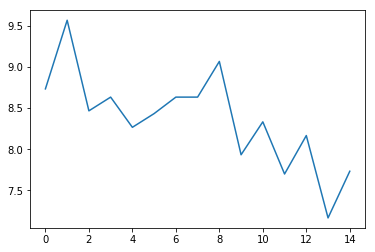

In [7]:
# Tracking fastest mile time over number of runs.
plt.plot(wos[0.5])

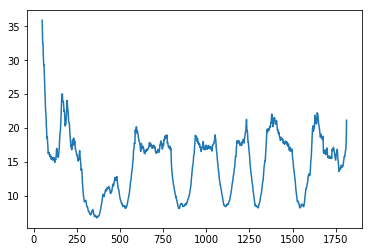

2019-04-13


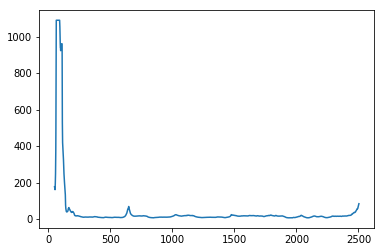

2019-04-16


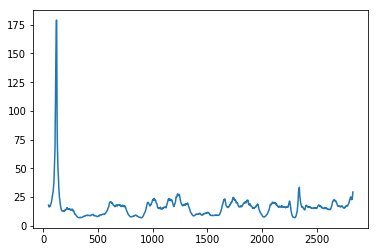

2019-04-20


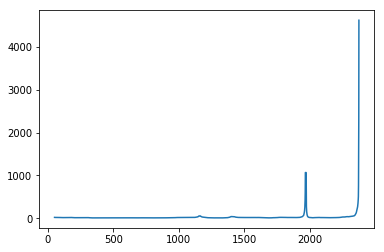

2019-04-22


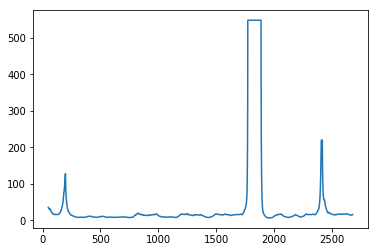

2019-04-24


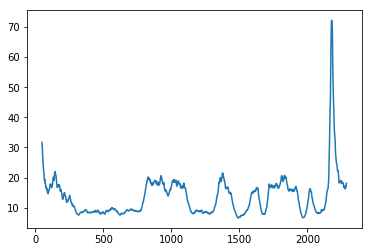

2019-04-27


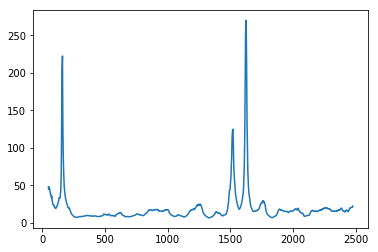

2019-04-30


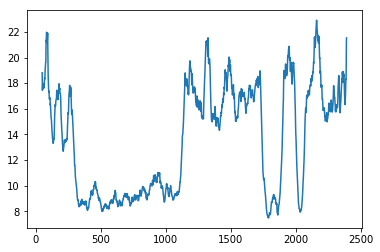

2019-05-04


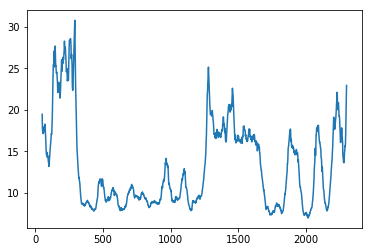

2019-05-06


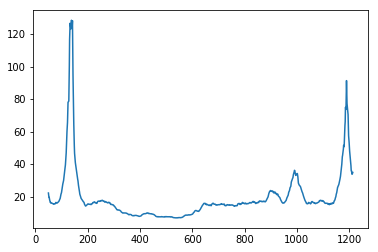

2019-05-11


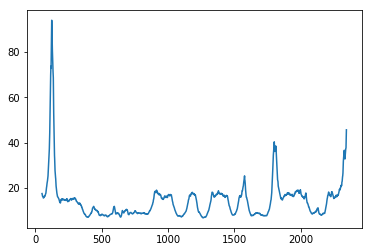

2019-05-13


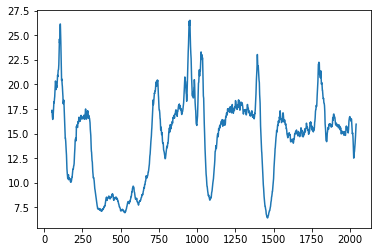

2019-05-20


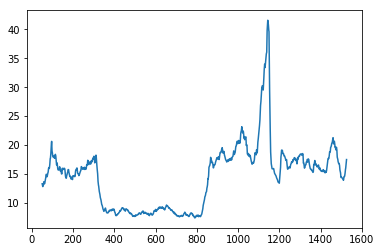

2019-05-26


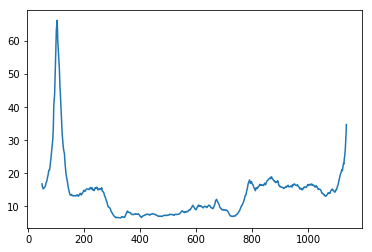

2019-05-31


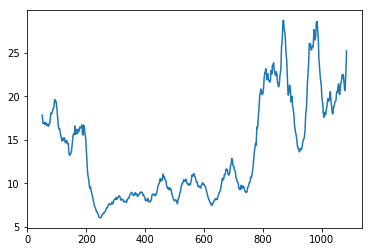

2019-06-02


In [8]:
# Looking at how pace changed during each run. 
for path in paths:
    with open('../data/raw/' + path) as f:
        data = json.load(f)
        
    points = data['laps'][0]['points']
    df = pd.DataFrame(points)
    df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    df['pace'] = df.time.diff(50)/df.dist.diff(50)*mile/60
    plt.plot(df.pace)
    plt.plot()
    plt.show()
    print(path[:10])